In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Prevent fuzziness for retina/3K screens, comment out on other screen types.
from lblcrn import *

## An Illustration of the Surface

In [2]:
grid = lblcrn.surface_crn.surface_crns.models.coord_grid.CoordGrid.from_poscar("lblcrn/surface_crn/connectivity/poscar_files/POSCAR_Fe_111", supercell_dimensions=1, 
                                                                               ignore_threhold=1.7)

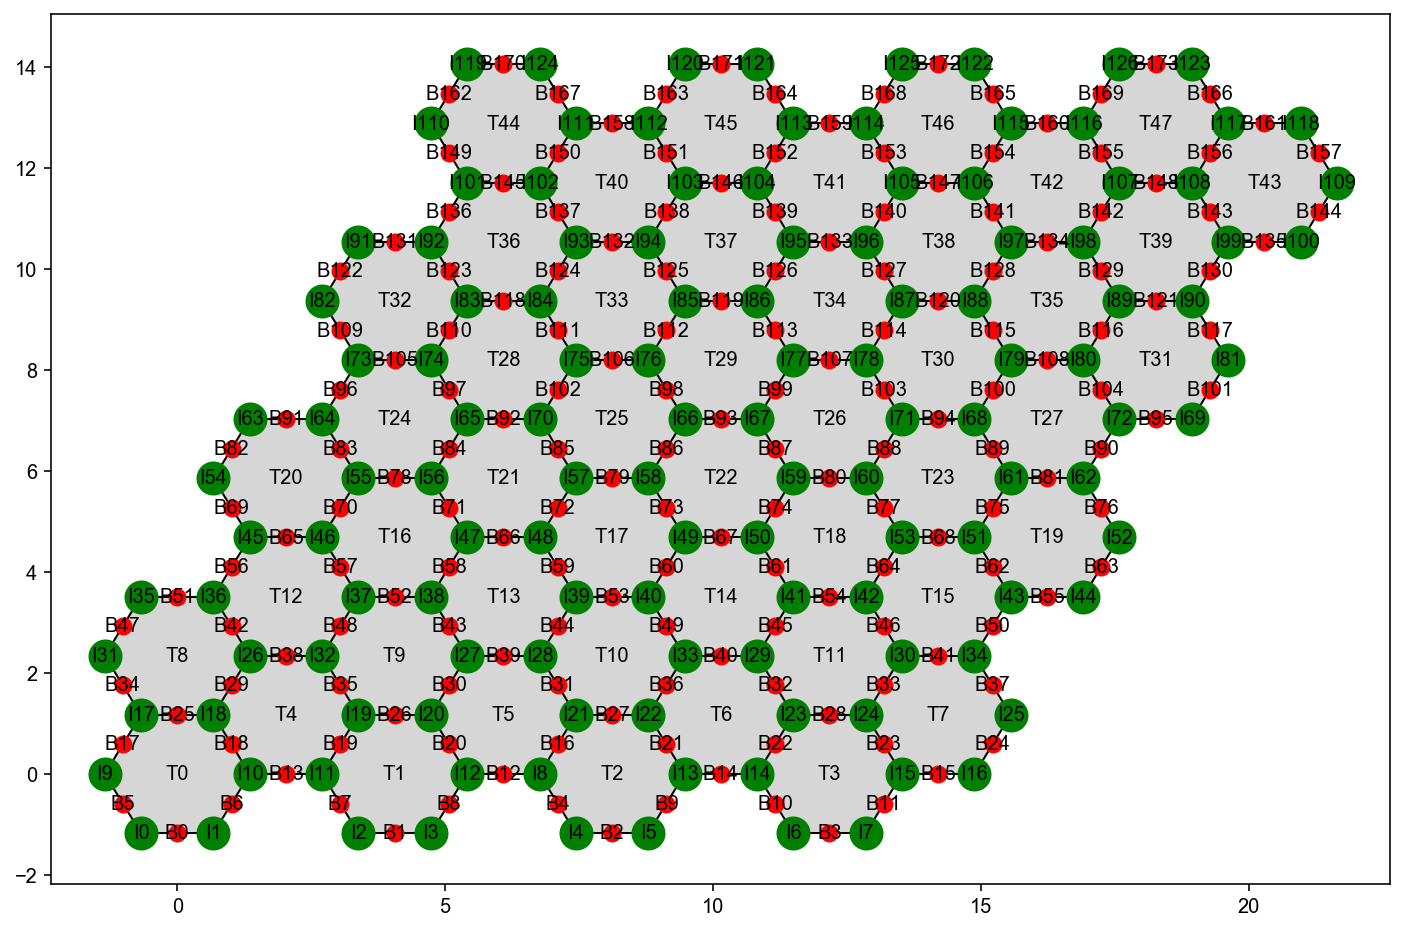

In [3]:
grid.voronoi_pic(show_node_number=True)

In [4]:
grid.print_connectivity_dictionary(node="T9")

{
    "Bridge": {
        "B26": [
            "I19",
            "I20",
            "T1",
            "T9"
        ],
        "B30": [
            "I20",
            "I27",
            "T5",
            "T9"
        ],
        "B35": [
            "I19",
            "I32",
            "T4",
            "T9"
        ],
        "B43": [
            "I27",
            "I38",
            "T13",
            "T9"
        ],
        "B48": [
            "I32",
            "I37",
            "T12",
            "T9"
        ],
        "B52": [
            "I37",
            "I38",
            "T16",
            "T9"
        ]
    },
    "Intersection": {
        "I19": [
            "B19",
            "B26",
            "B35",
            "T1",
            "T4",
            "T9"
        ],
        "I20": [
            "B20",
            "B26",
            "B30",
            "T1",
            "T5",
            "T9"
        ],
        "I27": [
            "B30",
            "B39",
            "B

## The Simulation 

In [5]:
sm = SpeciesManager()
s = Surface("Fe", color="#e1e1e1", poscar_file="lblcrn/surface_crn/connectivity/poscar_files/POSCAR_Fe_111", supercell_dimensions=1,
             surface_depth=1.7)

n = sm.sp("N", Orbital('1s', 530))
n_twofold = sm.sp(n, site=s.twofold)
n_threefold = sm.sp(n, site=s.threefold)

n2 = sm.sp("N2", Orbital('1s', 530))
n2_threefold = sm.sp(n2, site=s.threefold)
nh = sm.sp("NH", Orbital('1s', 530))
nh_twofold = sm.sp(nh, site=s.twofold)
nh2= sm.sp("NH2", Orbital('1s', 530))
nh2_threefold = sm.sp(nh2, site=s.threefold)
nh3 = sm.sp("NH3", Orbital('1s', 530))
h = sm.sp("H", Orbital('1s', 530))
h_threefold = sm.sp(h, site=s.threefold)


rsys = RxnSystem(
    sm,
    s,
    
    
    # 1, 2
    SurfaceRevRxn([nh2_threefold, h], [s.threefold, nh3], 1.27E+12, 2.05E+12),
    # 3, 4
    SurfaceRevRxn([n_twofold, h_threefold], [nh_twofold, s.threefold], 2.89E+12, 6.61E+12),
    # 5, 6
    SurfaceRevRxn([nh_twofold, h_threefold], [s.twofold, nh2_threefold], 9.02E+12, 2.75E+12),
    # 7, 8 
    SurfaceRevRxn([s], [n2], 3.32E+12, 3.94E+12),
    # 9, 10
    SurfaceRevRxn([n2, s.threefold], [s, n2_threefold], 8.13E+12, 5.76E+12),
    # 11, 12
    SurfaceRevRxn([n2_threefold, s.twofold], [n_threefold, n_twofold], 5.96E+12, 9.44E+11),
    SurfaceRxn([n_threefold, s.twofold], [s.threefold, n_twofold], 1E+14),
    # 13, 14
    SurfaceRevRxn([s.threefold, s], [h_threefold, h], 5.29E+12, 5.29E+12),
    # 15
    # SurfaceRxn([s], [nh3], 1.64E+12)
    SurfaceRxn([nh3], [s], 2.43E+12),
    # 16, 17
    SurfaceRevRxn([nh2_threefold, s], [s.threefold, nh2], 7.09E+12, 1.41E+13),
    # 18, 19
    SurfaceRevRxn([nh_twofold, s], [s.twofold, nh], 3.56E+12, 1.41E+13),
    # 20, 21
    SurfaceRevRxn([n_twofold, s], [s.twofold, n], 3.56E+12, 1.41E+13),
    # 22, 23
    SurfaceRevRxn([h_threefold, s], [s.threefold, h], 7.09E+12, 1.41E+13),
    
    Conc(n2, 5),
    Conc(nh2, 2),
)

In [6]:
results = scrn_simulate(rsys, 3E-10, video=False, spectra_in_video=True, spectra_average_duration=3, ensemble_size=1)

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


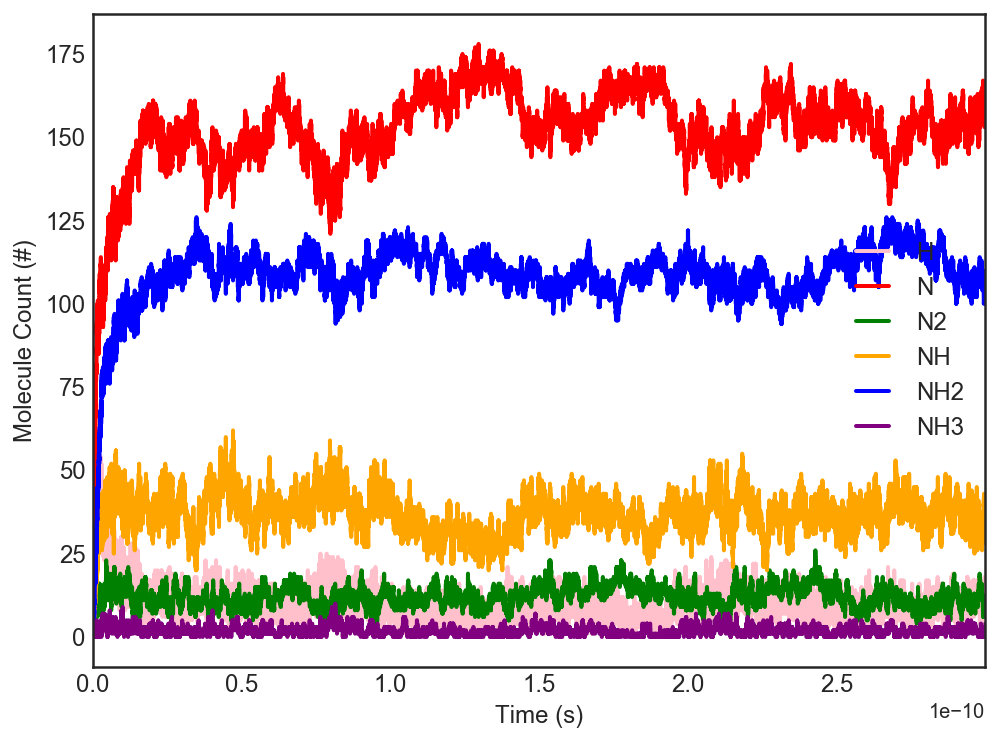

In [7]:
results.plot_evolution(use_raw_data=True)

In [8]:
results.df_raw

,H,H_threefold,N,N2,N2_threefold,NH,NH2,NH2_threefold,NH3,NH_twofold,N_threefold,N_twofold
Time (s),,,,,,,,,,,,
0.000000e+00,0,0,0,5,0,0,2,0,0,0,0,0
1.140677e-15,0,0,0,4,0,0,2,0,0,0,0,0
1.502735e-15,0,0,0,5,0,0,2,0,0,0,0,0
2.507503e-15,2,1,0,5,0,0,2,0,0,0,0,0
2.845410e-15,4,2,0,5,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2.999866e-10,14,13,154,9,7,41,100,91,4,36,0,133
2.999868e-10,14,13,154,9,7,41,100,91,4,36,0,134
2.999904e-10,14,13,154,9,7,41,100,91,4,36,0,133


/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


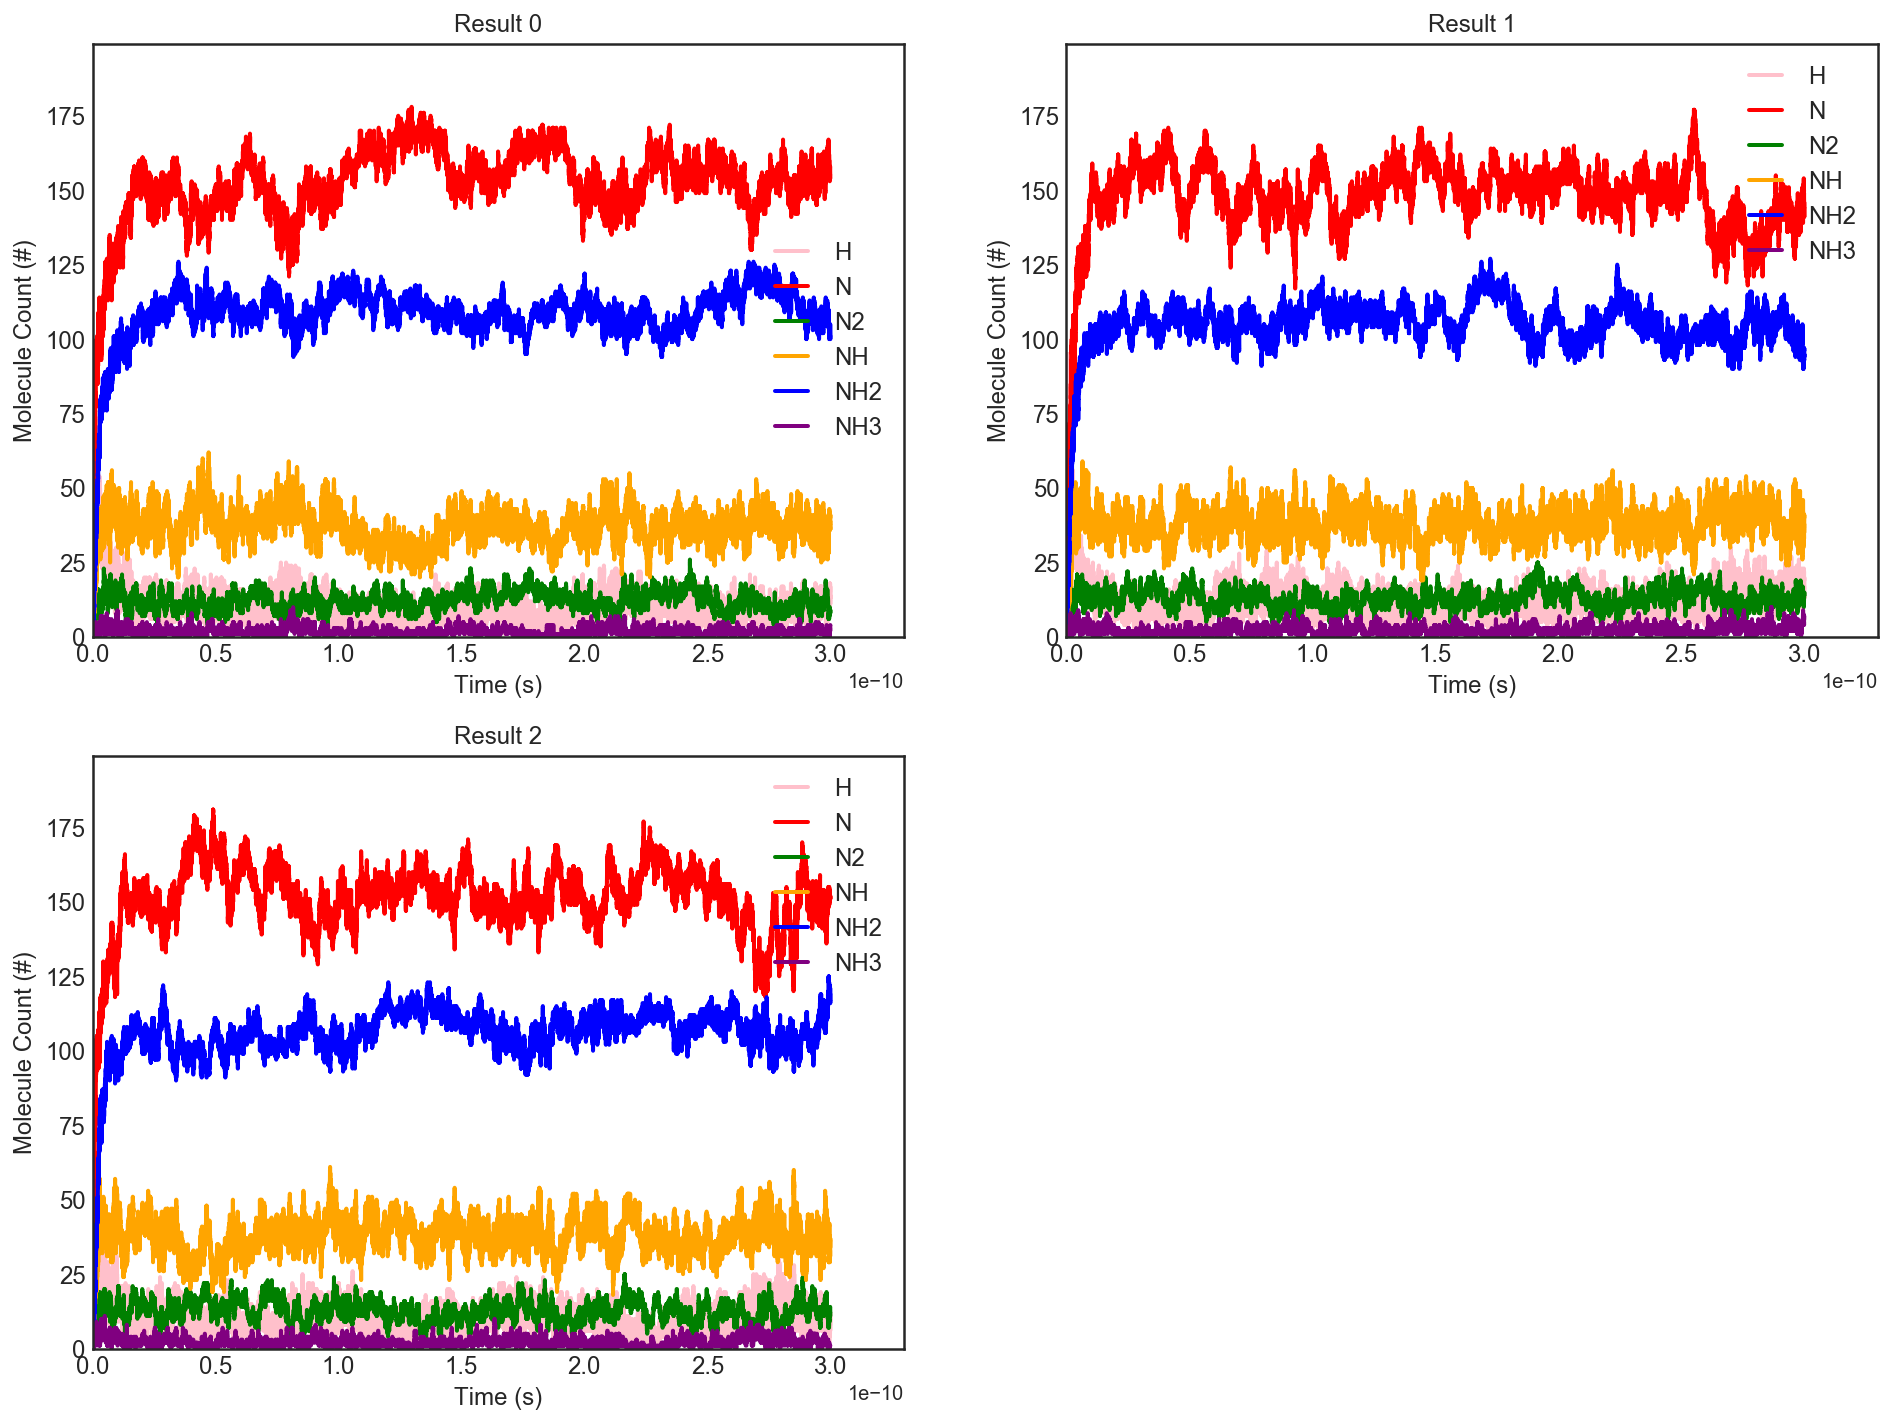

In [9]:
ensemble = scrn_simulate(rsys, 3E-10, video=False, spectra_in_video=True, spectra_average_duration=3, ensemble_size=3)
ensemble.plot_all()

In [10]:
ensemble[0].df_raw

,H,H_threefold,N,N2,N2_threefold,NH,NH2,NH2_threefold,NH3,NH_twofold,N_threefold,N_twofold
Time (s),,,,,,,,,,,,
0.000000e+00,0,0,0,5,0,0,2,0,0,0,0,0
1.140677e-15,0,0,0,4,0,0,2,0,0,0,0,0
1.502735e-15,0,0,0,5,0,0,2,0,0,0,0,0
2.507503e-15,2,1,0,5,0,0,2,0,0,0,0,0
2.845410e-15,4,2,0,5,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2.999866e-10,14,13,154,9,7,41,100,91,4,36,0,133
2.999868e-10,14,13,154,9,7,41,100,91,4,36,0,134
2.999904e-10,14,13,154,9,7,41,100,91,4,36,0,133
